In [1]:
import sys
import os

path = os.path.abspath("./DeepLearningTest")
if path not in sys.path:
    sys.path.append(path)

import torch
import numpy
import common

torch.set_default_dtype(torch.float32)

In [2]:
def show_info(result):
    print(f"Mean={result.mean()}")
    print(f"Median={numpy.median(result)}")
    print(f"Min={result.min()}")
    print(f"Max={result.max()}")
    print(f"Stddev={numpy.std(result)}")
    common.plot_score(test_data.X, result)

# Setup

In [3]:
dataset_n = 20
test_data = common.TestData(dataset_n)

def test_parameter(activation_func):
    return common.TestParameter(
        hidden_layers=hidden_layers,
        layer_size=layer_size,
        activation_func=activation_func,
        max_epoch=max_epoch,
        lr=lr,
        betas=betas,
        eps=eps,
        weight_decay=weight_decay,
        test_data=test_data
    )


# Parameters for ReLU & Sigmoid

In [4]:
hidden_layers = 1
layer_size = 32

max_epoch = 200
lr = 0.1
betas = (0.9, 0.99)
eps = 0.000_000_1
weight_decay = 0.0

# ReLU

In [5]:
result_relu = common.run_test_multiple(parameter=test_parameter(torch.nn.ReLU), runs=20)

Run #1
80/400
160/400
240/400
320/400
400/400

Run #2
80/400
160/400
240/400
320/400
400/400

Run #3
80/400
160/400
240/400
320/400
400/400

Run #4
80/400
160/400
240/400
320/400
400/400

Run #5
80/400
160/400
240/400
320/400
400/400

Run #6
80/400
160/400
240/400
320/400
400/400

Run #7
80/400
160/400
240/400
320/400
400/400

Run #8
80/400
160/400
240/400
320/400
400/400

Run #9
80/400
160/400
240/400
320/400
400/400

Run #10
80/400
160/400
240/400
320/400
400/400

Run #11
80/400
160/400
240/400
320/400
400/400

Run #12
80/400
160/400
240/400
320/400
400/400

Run #13
80/400
160/400
240/400
320/400
400/400

Run #14
80/400
160/400
240/400
320/400
400/400

Run #15
80/400
160/400
240/400
320/400
400/400

Run #16
80/400
160/400
240/400
320/400
400/400

Run #17
80/400
160/400
240/400
320/400
400/400

Run #18
80/400
160/400
240/400
320/400
400/400

Run #19
80/400
160/400
240/400
320/400
400/400

Run #20
80/400
160/400
240/400
320/400
400/400

25.67 s/run


Mean=0.03392342730634846
Median=0.02926401998847723
Min=0.0225423960480839
Max=0.15615536645054817
Stddev=0.015449140978593763


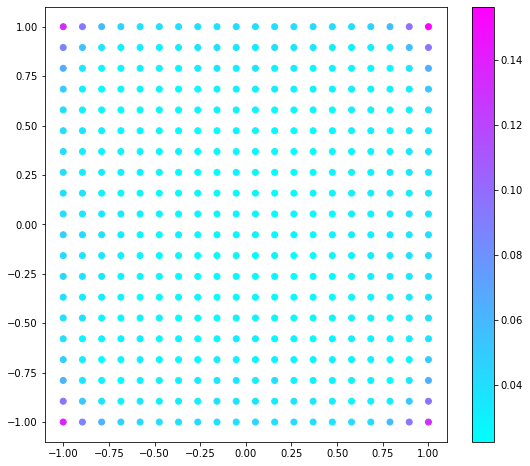

In [6]:
show_info(result_relu)

# Sigmoid

In [7]:
result_sigmoid = common.run_test_multiple(parameter=test_parameter(torch.nn.Sigmoid), runs=20)

Run #1
80/400
160/400
240/400
320/400
400/400

Run #2
80/400
160/400
240/400
320/400
400/400

Run #3
80/400
160/400
240/400
320/400
400/400

Run #4
80/400
160/400
240/400
320/400
400/400

Run #5
80/400
160/400
240/400
320/400
400/400

Run #6
80/400
160/400
240/400
320/400
400/400

Run #7
80/400
160/400
240/400
320/400
400/400

Run #8
80/400
160/400
240/400
320/400
400/400

Run #9
80/400
160/400
240/400
320/400
400/400

Run #10
80/400
160/400
240/400
320/400
400/400

Run #11
80/400
160/400
240/400
320/400
400/400

Run #12
80/400
160/400
240/400
320/400
400/400

Run #13
80/400
160/400
240/400
320/400
400/400

Run #14
80/400
160/400
240/400
320/400
400/400

Run #15
80/400
160/400
240/400
320/400
400/400

Run #16
80/400
160/400
240/400
320/400
400/400

Run #17
80/400
160/400
240/400
320/400
400/400

Run #18
80/400
160/400
240/400
320/400
400/400

Run #19
80/400
160/400
240/400
320/400
400/400

Run #20
80/400
160/400
240/400
320/400
400/400

34.38 s/run


Mean=0.0231908287180122
Median=0.02217468093149364
Min=0.013293759198859334
Max=0.04344430174678564
Stddev=0.005298743782263999


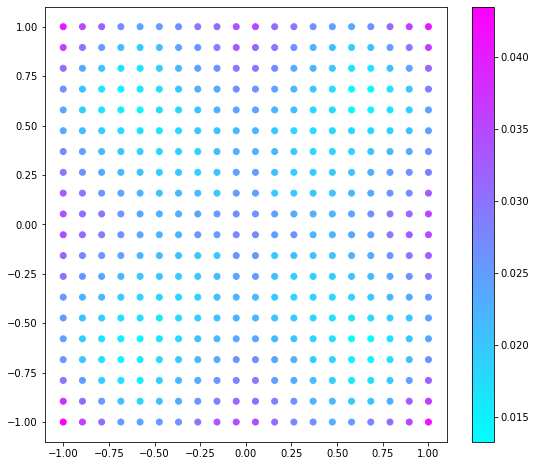

In [8]:
show_info(result_sigmoid)

# Polynomial (3rd degree / Quadratic)

In [12]:
@torch.jit.script
def calc_polynomial_3(x, cs):
    return cs[2] * x * x + cs[1] + cs[0]

class Polynomial3(torch.nn.Module):
    def __init__(self):
        super(Polynomial3, self).__init__()
        self.coefficients = torch.nn.Parameter(torch.zeros(3))
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(calc_polynomial_3(x, self.coefficients))

In [16]:
hidden_layers = 1
layer_size = 32

max_epoch = 50
lr = 0.1
betas = (0.9, 0.99)
eps = 0.000_0001
weight_decay = 0.0

In [17]:
result_polynomial3 = common.run_test_multiple(parameter=test_parameter(Polynomial3), runs=20)

Run #1
80/400
160/400
240/400
320/400
400/400

Run #2
80/400
160/400
240/400
320/400
400/400

Run #3
80/400
160/400
240/400
320/400
400/400

Run #4
80/400
160/400
240/400
320/400
400/400

Run #5
80/400
160/400
240/400
320/400
400/400

Run #6
80/400
160/400
240/400
320/400
400/400

Run #7
80/400
160/400
240/400
320/400
400/400

Run #8
80/400
160/400
240/400
320/400
400/400

Run #9
80/400
160/400
240/400
320/400
400/400

Run #10
80/400
160/400
240/400
320/400
400/400

Run #11
80/400
160/400
240/400
320/400
400/400

Run #12
80/400
160/400
240/400
320/400
400/400

Run #13
80/400
160/400
240/400
320/400
400/400

Run #14
80/400
160/400
240/400
320/400
400/400

Run #15
80/400
160/400
240/400
320/400
400/400

Run #16
80/400
160/400
240/400
320/400
400/400

Run #17
80/400
160/400
240/400
320/400
400/400

Run #18
80/400
160/400
240/400
320/400
400/400

Run #19
80/400
160/400
240/400
320/400
400/400

Run #20
80/400
160/400
240/400
320/400
400/400

10.90 s/run


Mean=0.017121032988012305
Median=0.016625330992974342
Min=0.013104355498217046
Max=0.028530186600983144
Stddev=0.002499585671787866


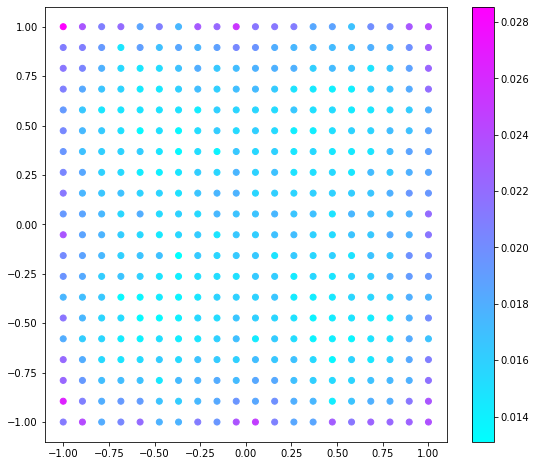

In [18]:
show_info(result_polynomial3)